In [1]:
%matplotlib inline

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer


pd.set_option('display.max_colwidth', 120)

In [13]:
wine_df_full = pd.read_csv('data/wine_reviews.csv')
print(len(wine_df_full))

85128


In [14]:
wine_df = wine_df_full.sample(10000)



In [15]:
wine_df['description'].values[250]

'The wine has barnyard aromas that need to blow off. It has firm dry tannins and dense red fruits that, again, need to integrate. It has a good future, though, as a wine that will be solid, rich and dense. Drink from 2024.'

In [16]:
wine_df['description'].values[5235]

'Flat and somewhat disjointed, this wine offers a strong taste of eucalyptus in a light-bodied, simply structured frame.'

<div class="alert alert-info">
<h3> Your turn</h3>
<p> As a group, take a look at the text of the wine descriptions. When writing a wine review, what are the different topics that are covered? Make a list of four topics and three example words from each topic.
</div> 




![](images/lda.jpg)

In [39]:
from sklearn.decomposition import LatentDirichletAllocation

In [18]:
vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,2),
                             max_df      = .50,
                             min_df      = .01,
                             stop_words   = 'english',
                             max_features = None)

In [19]:
vectorizer.fit(wine_df['description'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=0.01,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [20]:
review_word_counts = vectorizer.transform(wine_df['description'])

In [31]:
lda_model = LatentDirichletAllocation(n_components   = 10)

In [32]:
lda_model.fit(review_word_counts)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

## Some fit statistics

In [33]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(review_word_counts))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(review_word_counts))

Log Likelihood:  -1852683.005195479
Perplexity:  244.77367566579036


## Guidelines on topic fit
1. Low perplexity on test data.
1. Topical coherence
2. Best fit in a classification task.
3. Extract more and then bin them yourself. 

In [34]:
print(lda_model.get_params())

{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 10, 'n_jobs': None, 'n_topics': None, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [35]:
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

In [36]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, review_word_counts, vectorizer, mds='tsne')
panel

/Users/nealcaren/anaconda3/envs/kuleuven/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2       43.601002   89.556671       1        1  13.336263
1       85.726974  233.422745       2        1  12.338448
5      101.227226 -189.986176       3        1  12.190601
4      -98.214508  152.095200       4        1  11.248269
7      -22.446373  -42.052296       5        1  10.143022
8     -170.957199   -6.699943       6        1   9.957861
0      124.590050  -33.341774       7        1   9.235131
9      266.232880  -80.053696       8        1   8.415285
6      -75.997704 -183.987457       9        1   7.987691
3      218.332611  104.679405      10        1   5.147428, topic_info=    Category          Freq                Term         Total  loglift  logprob
83   Default   1660.000000            cabernet   1660.000000  30.0000  30.0000
443  Default  12410.000000                wine  12410.000000  29.0000  29.0000
65   Default   1938.000000               blend   1938.000000  28.0000  28.0000
295  Default   5714.000000              palate   5714.000000  27.0000  27.0000
28   Default   5860.000000              aromas   5860.000000  26.0000  26.0000
24   Default   1942.000000               apple   1942.000000  25.0000  25.0000
55   Default   4221.000000               black   4221.000000  24.0000  24.0000
359  Default   1145.000000           sauvignon   1145.000000  23.0000  23.0000
167  Default   5275.000000              finish   5275.000000  22.0000  22.0000
96   Default   4299.000000              cherry   4299.000000  21.0000  21.0000
175  Default   9743.000000             flavors   9743.000000  20.0000  20.0000
45   Default   2591.000000               berry   2591.000000  19.0000  19.0000
263  Default    906.000000              merlot    906.000000  18.0000  18.0000
69   Default   1581.000000              bodied   1581.000000  17.0000  17.0000
260  Default    943.000000              medium    943.000000  16.0000  16.0000
103  Default   1823.000000              citrus   1823.000000  15.0000  15.0000
122  Default   1992.000000               crisp   1992.000000  14.0000  14.0000
85   Default    773.000000  cabernet sauvignon    773.000000  13.0000  13.0000
239  Default   1394.000000               lemon   1394.000000  12.0000  12.0000
12   Default   5245.000000             acidity   5245.000000  11.0000  11.0000
196  Default   2137.000000              fruits   2137.000000  10.0000  10.0000
404  Default   4444.000000             tannins   4444.000000   9.0000   9.0000
310  Default   1059.000000               pinot   1059.000000   8.0000   8.0000
141  Default   4712.000000               drink   4712.000000   7.0000   7.0000
336  Default   3319.000000                 red   3319.000000   6.0000   6.0000
197  Default   1482.000000              fruity   1482.000000   5.0000   5.0000
334  Default    813.000000               ready    813.000000   4.0000   4.0000
440  Default   1834.000000               white   1834.000000   3.0000   3.0000
399  Default    821.000000               syrah    821.000000   2.0000   2.0000
279  Default   2656.000000                nose   2656.000000   1.0000   1.0000
..       ...           ...                 ...           ...      ...      ...
0    Topic10    146.399102                  10    293.666343   2.2706  -4.7743
82   Topic10    132.462530                 cab    273.594823   2.2413  -4.8744
40   Topic10    112.317531               based    238.752274   2.2126  -5.0393
288  Topic10     60.260636               olive    241.429489   1.5788  -5.6620
90   Topic10    170.251715              cassis    698.448292   1.5551  -4.6234
423  Topic10     66.404934              valley    289.999752   1.4926  -5.5649
432  Topic10     77.203506           vineyards    342.278615   1.4775  -5.4142
1    Topic10     68.376197                 100    336.559960   1.3729  -5.5356
259  Topic10     71.059267                meat    368.053181   1.3220  -5.4971
268  Topic10     55.52

<div class="alert alert-info">
<h3> Your turn</h3>
<p> What are the major themes in music lyrics? I've sampled 5,000 lyrics from each of five different genres (country, hip-hop, metal, pop, and rock). Run and evaluate a topic model with eight topics.
</div> 





In [ ]:
lyrics_url = 'https://raw.githubusercontent.com/nealcaren/KULeuvenBigData/master/notebooks/data/lyrics.json'
lyrics_df_full = pd.read_json(lyrics_url)
lyrics_df_sample = lyrics_df_full.sample(5000)

LatentDirichletAllocation doesn't make it easy to extra the results as dataframes.

In [41]:
def column_swap(column):
    column = column.sort_values(ascending = False)
    return column.index

def topic_words_df(lda_model, vectorizer):
    '''
    Generate dataframe of words associated with a topic model.
    '''
    
    word_topic_scores = lda_model.components_.T
    vocabulary        = vectorizer.get_feature_names()
    
    
    topic_words_df = pd.DataFrame(word_topic_scores,
                                  index = vocabulary)
    
    topic_words_df = topic_words_df.apply(column_swap).reset_index(drop = True).rename_axis('rank')
    
    topic_words_df.index = topic_words_df.index + 1
    
    return topic_words_df

In [42]:
topic_words_df(lda_model, vectorizer).head(10)

,0,1,2,3,4,5,6,7,8,9
rank,,,,,,,,,,
1,flavors,wine,flavors,cabernet,crisp,palate,wine,flavors,wine,flavors
2,wine,fruit,fruit,blend,citrus,black,bodied,finish,acidity,fruit
3,pinot,drink,cherry,sauvignon,acidity,cherry,medium,aromas,drink,vanilla
4,dry,tannins,black,merlot,apple,aromas,aromas,palate,red,apple
5,cherry,ripe,finish,cabernet sauvignon,flavors,tannins,fruit,berry,fruits,sweet
6,sweet,years,aromas,syrah,lemon,pepper,light,nose,fruity,wine
7,cherries,rich,wine,franc,wine,red,offers,plum,ripe,oak
8,noir,age,blackberry,cabernet franc,fresh,nose,medium bodied,herbal,soft,chardonnay
9,good,aging,tannins,petit,palate,dried,fresh,fruit,ready,finish


## What documents are associated with what topics?

In [43]:
wine_topics = lda_model.transform(review_word_counts)

In [44]:
wine_topics

array([[0.00666815, 0.00666865, 0.00666747, ..., 0.38608276, 0.00666913,
        0.56057238],
       [0.00555623, 0.78870785, 0.00555601, ..., 0.00555581, 0.00555714,
        0.00555703],
       [0.00454591, 0.12482495, 0.00454572, ..., 0.00454569, 0.83880879,
        0.0045457 ],
       ...,
       [0.4377342 , 0.00555785, 0.00555649, ..., 0.00555609, 0.0055574 ,
        0.00555642],
       [0.00714673, 0.40869664, 0.00714518, ..., 0.00714312, 0.53414665,
        0.00714414],
       [0.00666753, 0.27614559, 0.00666777, ..., 0.00666769, 0.00666707,
        0.00666756]])

In [45]:
pd.DataFrame(wine_topics).head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.006668,0.006669,0.006667,0.006667,0.006669,0.006667,0.006668,0.386083,0.006669,0.560572
1,0.005556,0.788708,0.005556,0.005556,0.166842,0.005556,0.005556,0.005556,0.005557,0.005557
2,0.004546,0.124825,0.004546,0.004546,0.004546,0.004546,0.004546,0.004546,0.838809,0.004546
3,0.004763,0.004762,0.728326,0.004763,0.004762,0.004764,0.233570,0.004763,0.004763,0.004764
4,0.251383,0.152839,0.005883,0.005883,0.554589,0.005883,0.005886,0.005884,0.005885,0.005884
5,0.005556,0.005557,0.005556,0.005556,0.367353,0.588195,0.005557,0.005556,0.005556,0.005557
6,0.543883,0.004547,0.004547,0.004547,0.004546,0.419744,0.004547,0.004546,0.004547,0.004546
7,0.007695,0.007694,0.007694,0.007693,0.007695,0.007695,0.007698,0.007700,0.930743,0.007693
8,0.007143,0.007144,0.007144,0.007144,0.358774,0.007144,0.584073,0.007144,0.007143,0.007145
9,0.004349,0.004350,0.234898,0.004349,0.004348,0.004349,0.730311,0.004348,0.004348,0.004348


We can now use our topics as features

In [46]:
%matplotlib inline

import pandas as pd
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from afinn import Afinn

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation



In [47]:
lr_classifier = LogisticRegression(solver = 'lbfgs', max_iter= 5000)


In [48]:
lr_classifier.fit(wine_topics, wine_df['rating'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
prediction = lr_classifier.predict(wine_topics)

In [50]:
print(accuracy_score(wine_df['rating'], prediction))



0.7422


In [52]:
print(classification_report(wine_df['rating'], prediction))

              precision    recall  f1-score   support

        High       0.71      0.60      0.65      7952
         Low       0.76      0.84      0.80     12048

   micro avg       0.74      0.74      0.74     20000
   macro avg       0.73      0.72      0.72     20000
weighted avg       0.74      0.74      0.74     20000



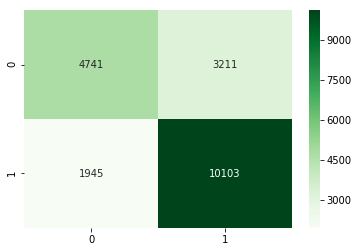

In [55]:
import seaborn as sns

cm = confusion_matrix(wine_df['rating'], prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Using the song database, how does a logistic regression classifier using topics work? How does it compare to a model that uses word counts?

</div>


<div class="alert alert-info">
<h3> Your turn</h3>
<p> Whater were the major themes in Donald Trump's general election speeches? 
</div>



In [147]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
from IPython.display import Image



dtc = DecisionTreeClassifier(max_depth = 3, #  Split the sample only three times.
                             min_samples_leaf = 10) # Make sure each leaf 




In [148]:
x_names = ['max_players', 'min_players', 'min_playtime', 'max_playtime', 'min_age']

dtc.fit(bg_df[x_names], bg_df['quality_game'])



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

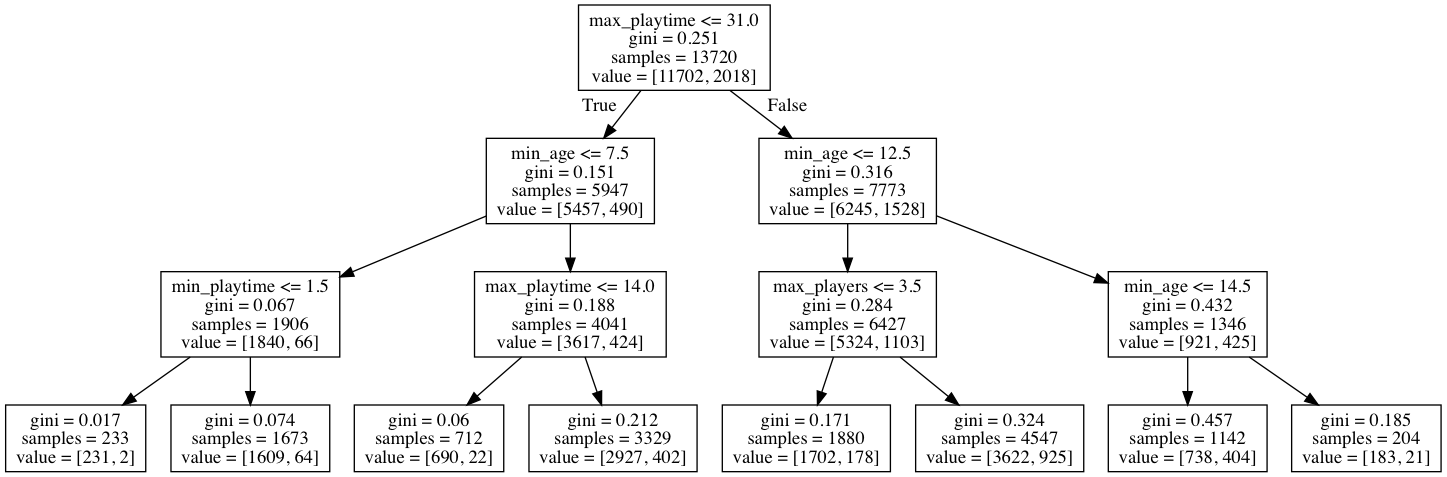

In [149]:
export_graphviz(dtc, 
                out_file='dtc.dot', 
                feature_names=x_names)
                
!dot -Tpng dtc.dot -o  dtc.png
Image(filename='dtc.png') 

In [179]:
from sklearn.ensemble import RandomForestClassifier




In [180]:
rf = RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [181]:
rf.fit(bg_df[x_names], bg_df['quality_game'])



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [182]:
imp = pd.DataFrame(rf.feature_importances_, index = x_names)
imp

,0
max_players,0.241430
min_players,0.108830
min_playtime,0.203080
max_playtime,0.237414
min_age,0.209246


In [187]:
categories = ['category_cardgame',
       'category_wargame', 'category_fantasy', 'category_dice',
       'category_partygame', 'category_fighting', 'category_sciencefiction',
       'category_abstractstrategy', 'category_economic',
       'category_childrensgame', 'category_worldwarii', 'category_bluffing',
       'category_animals', 'category_humor', 'category_actiondexterity',
       'category_adventure', 'category_moviestvradiotheme',
       'category_medieval', 'category_deduction', 'category_miniatures']

mechanics = ['mechanic_dicerolling', 'mechanic_handmanagement',
       'mechanic_hexandcounter', 'mechanic_setcollection',
       'mechanic_variableplayerpowers', 'mechanic_none',
       'mechanic_tileplacement', 'mechanic_modularboard',
       'mechanic_carddrafting', 'mechanic_rollspinandmove',
       'mechanic_areacontrolareainfluence', 'mechanic_auctionbidding',
       'mechanic_simulation', 'mechanic_areamovement',
       'mechanic_simultaneousactionselection',
       'mechanic_actionpointallowancesystem', 'mechanic_cooperativeplay',
       'mechanic_pointtopointmovement', 'mechanic_partnerships',
       'mechanic_memory']

In [202]:
x_names = ['complexity', 'max_players', 'min_players', 'min_playtime', 'max_playtime', 'min_age'] 
x_names = x_names + mechanics + categories


,Unnamed: 0,index,name,description,max_players,min_players,min_playtime,max_playtime,min_age,category,...,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,Die Macher,"Die Macher is a game about seven sequential political races in different regions of Germany. Players are in charge of national political parties, and must manage limited resources to help their party to victory. The ...",5.0,3.0,240.0,240.0,14.0,"Economic, Negotiation, Political",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Dragonmaster,"Dragonmaster is a trick-taking card game based on an older game called Coup d'etat. Each player is given a supply of plastic gems, which represent points. Each player will get to be the dealer for five different hand...",4.0,3.0,30.0,30.0,12.0,"CardGame, Fantasy",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2.0,Samurai,"Part of the Knizia tile-laying trilogy, Samurai is set in medieval Japan. Players compete to gain the favor of three factions: samurai, peasants, and priests, which are represented by helmet, rice paddy, and Buddha t...",4.0,2.0,30.0,60.0,10.0,"AbstractStrategy, Medieval",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,3.0,Tal der KÃ¶nige,"When you see the triangular box and the luxurious, large blocks, you can tell this game was designed to be beautiful as well as functional. The object of the game is to build pyramids out of the different colored bl...",4.0,2.0,60.0,60.0,12.0,Ancient,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4.0,Acquire,"In Acquire, each player strategically invests in businesses, trying to retain a majority of stock. As the businesses grow with tile placements, they also start merging, giving the majority stockholders of the acquir...",6.0,3.0,90.0,90.0,12.0,Economic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,5.0,Mare Mediterraneum,"In the ancient lands along the Mediterranean, players attempt to satisfy their unique victory conditions via trade, war and construction. This lavishly produced game contains tons of wooden game components and a bea...",6.0,2.0,240.0,240.0,12.0,"Civilization, Nautical",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,6.0,Cathedral,"In Cathedral, each player has a set of pieces of a different color. The pieces are in the shapes of buildings, covering from one to five square units. The first player takes the single neutral Cathedral piece and pla...",2.0,2.0,20.0,20.0,8.0,AbstractStrategy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,7.0,Lords of Creation,"In this interesting offering from Warfrog, players become Gods seeking to dominate a world with their followers. The first part of the game involves constructing the game board, after which players take turns using ...",5.0,2.0,120.0,120.0,12.0,"Civilization, Fantasy",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.0,8.0,El Caballero,"Although referred to as a sequel to El Grande, El Caballero shares few aspects with its namesake, being a fun but intense brain-burner in which players explore and attempt to control the lands and waterways of the Ne...",4.0,2.0,90.0,90.0,13.0,Exploration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,9.0,Elfenland,Elfenland is a redesign of the original White Wind game Elfenroads. The game is set in the mythical world of the elves. A group of fledgling elves (the players) are charged with visiting as many of the twenty Elfen...,6.0,2.0,60.0,60.0,10.0,"Fantasy, Travel",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:


# Google "sklearn random forest"
from sklearn.model_selection import GridSearchCV

param_dist = {"max_features": [4],
              "min_samples_split": [10], 
             "class_weight" : ["balanced", None],
             "n_estimators" : [20, 25, 30, 35]}


rfgs = GridSearchCV( RandomForestClassifier(),
                  param_dist, 
                  cv = 5,                  
                  verbose=1 )

In [205]:
rfgs.fit(bg_df[x_names], bg_df['quality_game'])



Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   14.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4], 'min_samples_split': [10], 'class_weight': ['balanced', None], 'n_estimators': [20, 25, 30, 35]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [206]:
rfgs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [207]:
rf_best = rfgs.best_estimator_
pd.DataFrame(rf_best.feature_importances_, index = x_names).sort_values(by = 0)

,0
category_childrensgame,0.003584
category_actiondexterity,0.004004
category_partygame,0.004981
category_worldwarii,0.005507
category_moviestvradiotheme,0.006864
category_abstractstrategy,0.007163
category_humor,0.007265
mechanic_cooperativeplay,0.007869
mechanic_simulation,0.007869
category_miniatures,0.008260


In [158]:
results = pd.DataFrame(rfgs.cv_results_)

results

/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nealcaren/anac

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_class_weight,param_max_features,param_min_samples_split,param_n_estimators,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.035971,0.003265,0.692347,0.766254,balanced,4,10,3,"{'class_weight': 'balanced', 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 3}",12,...,0.745262,0.749271,0.690849,0.765510,0.597886,0.769518,0.002877,0.000604,0.060190,0.009190
1,0.044662,0.003466,0.698324,0.783473,balanced,4,10,5,"{'class_weight': 'balanced', 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 5}",11,...,0.763120,0.775966,0.705432,0.783912,0.612104,0.773982,0.004239,0.000408,0.051645,0.007626
2,0.083042,0.005658,0.712245,0.789450,balanced,4,10,10,"{'class_weight': 'balanced', 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 10}",9,...,0.770408,0.791181,0.711994,0.788922,0.617572,0.785461,0.001559,0.000153,0.056820,0.003434
3,0.127855,0.008309,0.716399,0.800784,balanced,4,10,15,"{'class_weight': 'balanced', 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 15}",7,...,0.765671,0.794916,0.723296,0.800401,0.622676,0.801221,0.006741,0.000515,0.054566,0.005317
4,0.202073,0.013132,0.711953,0.795536,balanced,4,10,25,"{'class_weight': 'balanced', 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 25}",10,...,0.763848,0.788448,0.720744,0.795117,0.608458,0.791382,0.002880,0.000554,0.056656,0.007897
5,0.426163,0.029572,0.715889,0.800091,balanced,4,10,50,"{'class_weight': 'balanced', 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 50}",8,...,0.777697,0.792912,0.726577,0.804409,0.609552,0.797030,0.012709,0.002753,0.059357,0.008176
6,0.032092,0.002788,0.827551,0.875638,None,4,10,3,"{'class_weight': None, 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 3}",6,...,0.860423,0.872540,0.840685,0.873098,0.741524,0.878564,0.001444,0.000186,0.043707,0.002381
7,0.065479,0.005214,0.828717,0.878280,None,4,10,5,"{'class_weight': None, 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 5}",5,...,0.861152,0.874453,0.841415,0.877471,0.748451,0.882664,0.001335,0.000455,0.040815,0.002629
8,0.176274,0.010163,0.838557,0.881013,None,4,10,10,"{'class_weight': None, 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 10}",1,...,0.863338,0.878007,0.849435,0.879840,0.773970,0.885215,0.056332,0.001918,0.032840,0.002381
9,0.220291,0.013547,0.834913,0.881378,None,4,10,15,"{'class_weight': None, 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 15}",4,...,0.864431,0.878371,0.840321,0.879111,0.764127,0.884941,0.026049,0.001387,0.036385,0.002402


<div class="alert alert-info">
<h3> Your super big challenge</h3>
<p> You want to make a quality game. Based on this dataset, what sort of game should you make? Use a random forest model to find the best set up parameters. 
<p> Bonus challenge: Use both features in the data set and ones you construct from a topic model!

</div>


In [ ]:
rf_prediction = rf_best.predict_proba(bg_df[x_names])

In [ ]:
from sklearn.calibration import calibration_curve


def calplot(y_observed, y_predicted):
    rf_y, rf_x = calibration_curve(y_observed, y_predicted[:,1], n_bins=10)
    pd.DataFrame([rf_x , rf_y]).T.plot.scatter(x=0, y=1, figsize = (5,5))

In [ ]:
calplot(bg_df['quality_game'], rf_prediction)

In [ ]:
idf = pd.Series(rf_best.feature_importances_, index = x_names)

idf.sort_values()

In [ ]:
idf.sort_values().plot(kind='barh', )

In [ ]:
bg_df.keys()